
# **Sesgo(Bias), variance, y el trade-off**
Machine learning los modelos no son perfectos; son propensos a una serie de errores. Las dos fuentes más comunes de errores son el sesgo y la varianza. Aunque son dos problemas distintos, están interconectados y se relacionan con el grado de libertad o complejidad disponible de un modelo.

**Qué es el Sesgo o bias?**

Bias o Sesgo se refiere a la incapacidad de un método para estimar correctamente el objetivo. 
En el aprendizaje automático, el sesgo se refiere a la diferencia entre la predicción esperada y su objetivo. Los modelos sesgados no pueden ajustarse correctamente a los datos de entrenamiento, lo que da como resultado un rendimiento deficiente dentro y fuera de la muestra. Un buen ejemplo de modelo sesgado surge cuando intentamos ajustar una función seno con una regresión lineal simple. El modelo no puede ajustarse a la función seno, ya que carece de la complejidad necesaria para hacerlo. Por lo tanto, no podrá funcionar bien dentro o fuera de la muestra. Este problema se llama desajuste. Un ejemplo gráfico se ilustra en la siguiente figura:

In [1]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(123456)

def f(x):
    return np.sin(x)

def sample(size):
    max_v = 20
    step = size/max_v
    x = [x/step for x in range(size)]
    y = [f(x)+np.random.uniform(-0.25,0.25) for x in x]
    return np.array(x).reshape(-1,1), np.array(y).reshape(-1,1)

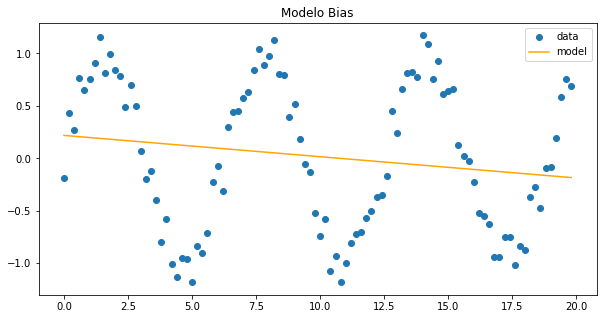

In [2]:
from sklearn.linear_model import LinearRegression
x, y = sample(100)


lr = LinearRegression()
lr.fit(x, y)
preds  =  lr.predict(x)
plt.figure(figsize=(10,5))
plt.scatter(x, y, label='data')
plt.plot(x, preds, color='orange', label='model')
plt.title('Modelo Bias')
plt.legend();

La fórmula matemática del sesgo es la diferencia entre el valor objetivo y la predicción esperada:
$$Bias-E[y]-t$$

## **¿Qué es la varianza?**
La varianza se refiere a cuánto varían los individuos dentro de un grupo. Una vez más, la varianza es un concepto de las estadísticas. Tomando una muestra de una población, la varianza indica cuánto difiere el valor de cada individuo de la media.

En el **Machine Learning**, la varianza se refiere a la variabilidad o sensibilidad del modelo a los cambios en los datos. Esto significa que los modelos de alta varianza generalmente pueden ajustarse bien a los datos de entrenamiento y, por lo tanto, lograr un alto rendimiento dentro de la muestra, pero tienen un rendimiento deficiente fuera de la muestra. Esto se debe a la complejidad del modelo. Por ejemplo, un árbol de decisiones puede tener una gran variación si crea una regla
para cada instancia del conjunto de datos de entrenamiento. A esto se le llama sobreajuste. La siguiente figura muestra un árbol de decisiones entrenado en el conjunto de datos anterior. Los puntos azules representan los datos de entrenamiento y los puntos naranjas representan los datos de la prueba.

Como es evidente, el modelo se ajusta perfectamente a los datos de entrenamiento, pero no funciona tan bien en los datos de prueba:

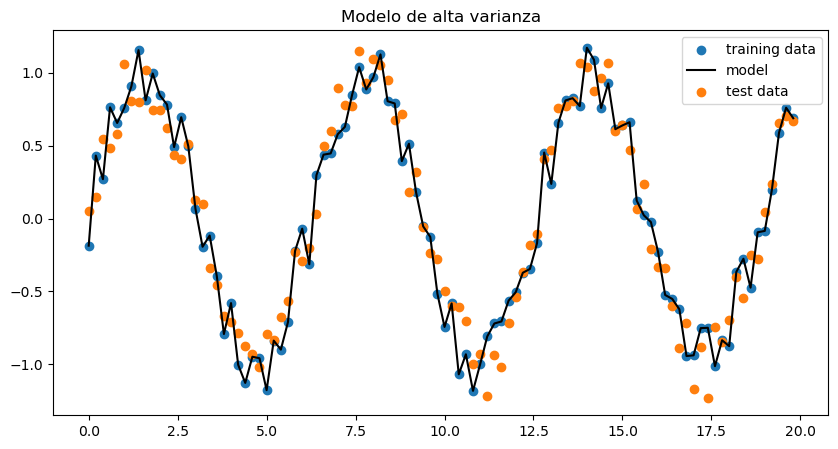

In [2]:
from sklearn.tree import DecisionTreeRegressor
x, y = sample(100)

dt = DecisionTreeRegressor()
dt.fit(x, y)
plt.figure(figsize=(10,5))
plt.scatter(x, y, label='training data')
x, y = sample(100)
preds  =  dt.predict(x)
plt.plot(x, preds, color='black', label='model')
plt.scatter(x, y, label='test data')
plt.title('Modelo de alta varianza')
plt.legend();

La fórmula matemática para la varianza se representa de la siguiente manera:

$$Variance=E[(y-E[y])^2] $$

Esencialmente, esta es la fórmula estándar para la varianza de la población, asumiendo que nuestra población está compuesta por nuestros modelos, ya que han sido producidos por el algoritmo de aprendizaje automático. Por ejemplo, como vimos anteriormente, Actualización del aprendizaje automático, las redes neuronales pueden tener diferentes resultados de entrenamiento, dependiendo de sus pesos iniciales. Si consideramos todas las redes neuronales con la misma arquitectura, pero diferentes pesos iniciales, al entrenarlas, tendremos una población de diferentes modelos.

## **Trade-off**
Bias y variance son dos de los tres componentes principales que comprenden el error de un modelo. El tercero se denomina error irreductible y se puede atribuir a la aleatoriedad inherente o la variabilidad de los datos. El error total de un modelo se puede descomponer de la siguiente manera:

$$Error=Bias^2 +variance+Irreducible error$$

Como vimos anteriormente, el sesgo y la varianza provienen de la misma fuente: la complejidad del modelo. Si bien el sesgo surge de muy poca complejidad y libertad, la varianza prospera en modelos complejos. Por lo tanto, no es posible reducir el sesgo sin aumentar la varianza y viceversa. Sin embargo, existe un punto óptimo de complejidad, donde el error se minimiza ya que el sesgo y la varianza se encuentran en un punto óptimo de compensación. Cuando la complejidad del modelo está en este punto óptimo (la línea punteada roja en la siguiente figura), entonces el modelo funciona mejor tanto dentro como fuera de la muestra. Como es evidente en la siguiente figura, el error nunca se puede reducir a cero.

Además, aunque algunos pueden pensar que es mejor reducir el sesgo, incluso a costa de una mayor varianza, está claro que el modelo no funcionaría mejor, incluso si fuera insesgado, debido al error que inevitablemente induce la varianza:

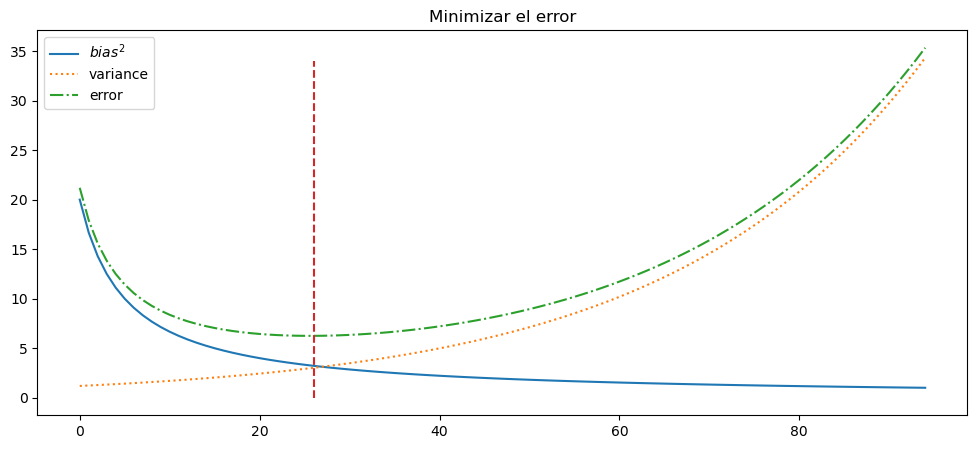

In [3]:
def bias(complexity):
    return 100/complexity

def variance(complexity):
    return np.exp(complexity/28)

r = range(5, 100)

variance_ = np.array([variance(x) for x in r])
bias_ =  np.array([bias(x) for x in r])
sum_ = variance_ + bias_
mins = np.argmin(sum_)
min_line = [mins for x in range(0, int(max(sum_)))]


plt.figure(figsize=(12,5))
plt.plot(bias_, label=r'$bias^2$', linestyle='-')
plt.plot(variance_, label='variance', linestyle=':')
plt.plot(sum_, label='error', linestyle='-.')
plt.plot(min_line, [x for x in range(0, int(max(sum_)))], linestyle='--')
plt.title('Minimizar el error')
plt.legend()

La siguiente gráfico muestra el modelo perfecto, con una cantidad mínima de sesgo y varianza combinados, o error reducible. Aunque el modelo no se ajusta perfectamente a los datos, esto se debe al ruido inherente al conjunto de datos. Si intentamos ajustar mejor los datos de entrenamiento, induceremos un sobreajuste (varianza). Si intentamos simplificar aún más el modelo, induciremos
desajuste (sesgo):

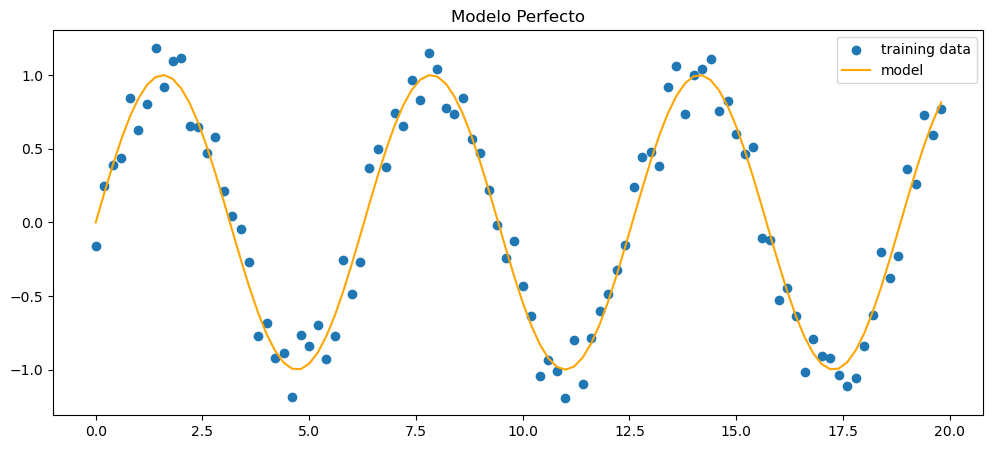

In [4]:
from sklearn.tree import DecisionTreeRegressor
x, y = sample(100)

plt.figure(figsize=(12,5))
plt.scatter(x, y, label='training data')

preds  =  f(x)
plt.plot(x, preds, color='orange', label='model')
plt.title('Modelo Perfecto');
plt.legend();

## Bias, Variance para Regresión
El siguiente ejemplo carga el conjunto de datos de viviendas de Boston directamente a través de la URL, lo divide en conjuntos de entrenamiento y prueba, luego estima el error cuadrático medio (MSE) para una regresión lineal, así como el sesgo y la varianza del error del modelo en 200 muestras de bootstrap.

In [1]:
# estimador del bias y variance para un modelo de regresión lineal
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mlxtend.evaluate import bias_variance_decomp
# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
dataframe = pd.read_csv(url, header=None)
# separate into inputs and outputs
data = dataframe.values
X, y = data[:, :-1], data[:, -1]
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# definimos el modelo 
model_lr = LinearRegression()
# estimate bias and variance
mse, bias, var = bias_variance_decomp(model_lr, X_train, y_train, X_test, y_test, loss='mse', num_rounds=200, random_seed=1)
y_pred=model_lr.predict(X_test)


In [2]:
from sklearn import metrics
print('MSE from bias_variance lib [avg expected loss]: %.3f' % mse)
print('Avg Bias: %.3f' % bias)
print('Avg Variance: %.3f' % var)
print('Mean Square error by Sckit-learn lib: %.3f' % metrics.mean_squared_error(y_test,y_pred))

MSE from bias_variance lib [avg expected loss]: 22.418
Avg Bias: 20.744
Avg Variance: 1.674
Mean Square error by Sckit-learn lib: 23.218


**Nota:** Sus resultados pueden variar dada la naturaleza estocástica del algoritmo o procedimiento de evaluación, o las diferencias en la precisión numérica. Considere ejecutar el ejemplo varias veces y compare el resultado promedio.

En este caso, podemos ver que el modelo tiene un sesgo alto y una varianza baja. Esto es de esperar dado que estamos utilizando un modelo de regresión lineal. También podemos ver que la suma de la media estimada y la varianza es igual al error estimado del modelo, p. 20.726 + 1.761 = 22.487.

### Después de podar — Usando LASSO

In [3]:
from sklearn.linear_model import LinearRegression, Lasso
lasso_model = Lasso(alpha=0.05)
error_reg_las, bias_reg_las, var_reg_las = bias_variance_decomp(lasso_model, X_train, y_train, X_test, y_test, loss='mse', random_seed=123)
print('MSE from bias_variance lib [avg expected loss]: %.3f' % error_reg_las)
print('Avg Bias: %.3f' % bias_reg_las)
print('Avg Variance: %.3f' % var_reg_las)
print('Mean Square error by Sckit-learn lib: %.3f' % metrics.mean_squared_error(y_test,y_pred))

MSE from bias_variance lib [avg expected loss]: 22.154
Avg Bias: 20.508
Avg Variance: 1.646
Mean Square error by Sckit-learn lib: 23.218


Se puede observar que el sesgo se ha reducido después de la regularización y hay un ligero aumento en la varianza y el error promedio total también se reduce.

Aunque lo hemos entendido en la práctica, veamos también una parte matemática.
Para los modelos de regresión, la descomposición de la varianza del sesgo se puede ver como una función de pérdida al cuadrado básicamente en 3 términos: varianza, sesgo y ruido.

Ignorando el término ruido,

Veamos el valor de Bias & Variance

Función objetivo, $y =f(x)$; 

función objetivo predicha, $\hat y=f^(x)=h(x)$;

la pérdida al cuadrado $S=(y−\hat y)^2$;

Expectativa ($E[\hat y]$): esto es sobre conjuntos de entrenamiento.

La predicción principal para la pérdida por error cuadrático es simplemente el promedio de las predicciones ($E[\hat y]$ (la expectativa es sobre los conjuntos de entrenamiento)

|Metrica| Squared Loss(MSE)| 0-1 Loss|
|-------|-----------------|--------|
|Single Loss   |$(y - \hat{y})^2$|$L(y, \hat{y})$|
|Expected loss  |$E[(y - \hat{y})^2]$ | $E[L(y, \hat{y})]$|
|Main prediction $E[\hat{y}]$ |media (promedio)| Moda|
|Bias2         |$ (y-E[{\hat{y}}])^2$| $L(y, E[\hat{y}])$|
|Variance      | $E[(E[{\hat{y}}] - \hat{y})^2]$ | $E[L(\hat{y}, E[\hat{y}])]$|


## Bias, Variance para Clasificación

Por lo tanto, como resultado de usar el modo para definir la predicción principal de la pérdida 0-1, el sesgo es 1 si la predicción principal no concuerda con la etiqueta verdadera $y$, y 0 en caso contrario:

$$Bias = \begin{cases}
1 \text{ if }  y \neq E[{\hat{y}}], \\
0 \text{ otherwise}.
\end{cases}$$

La varianza de la pérdida 0-1 se define como la probabilidad de que la etiqueta predicha no coincida con la predicción principal:
$$Variance = P(\hat{y} \neq E[\hat{{y}}])$$

A continuación, echemos un vistazo a lo que sucede con la pérdida si el sesgo es 0. Dada la definición general de pérdida, pérdida = sesgo + varianza, si el sesgo es 0, entonces definimos la pérdida como la varianza:
$$Loss = 0 + Variance = Loss = P(\hat{y} \neq y) = Variance = P(\hat{y} \neq E[\hat{{y}}])$$

En otras palabras, si un modelo tiene sesgo cero, su pérdida está completamente definida por la varianza, lo cual es intuitivo si pensamos en la varianza en el contexto de un sobreajuste proporcional.

El escenario más sorprendente es si el sesgo es igual a 1. Si el sesgo es igual a 1, el aumento de la varianza puede disminuir la pérdida, lo cual es una observación interesante. Esto se puede ver reescribiendo primero la función de pérdida 0-1 como:
$$Loss = P(\hat{y} \neq y) = 1 - P(\hat{y} = y)$$

(Tenga en cuenta que aún no hemos hecho nada nuevo). Ahora, si observamos la ecuación anterior del sesgo, si el sesgo es 1, tenemos $y \neq E[{\hat{y}}]$. Si $y$ no es igual a la predicción principal, pero $y$ también es igual a $\hat y$, entonces $\hat y$ debe ser igual a la predicción principal. Usando el "inverso" ("1 menos"), podemos escribir la pérdida como:
$$Loss = P(\hat{y} \neq y) = 1 - P(\hat{y} = y) = 1 - P(\hat{y} \neq E[{\hat{y}}])$$

Dado que el sesgo es 1, la pérdida se define como "pérdida = sesgo - varianza" si el sesgo es 1 (o "pérdida = 1 - varianza"). Esto puede parecer bastante poco intuitivo al principio, pero las explicaciones que ofrecen Kong, Dietterich y Domingos fueron que si un modelo tiene un sesgo muy alto, de modo que su predicción principal siempre es incorrecta, aumentar la varianza puede ser beneficioso, ya que aumentar la varianza empujaría el límite de decisión, lo que podría conducir a algunas predicciones correctas solo por casualidad entonces. En otras palabras, para escenarios con alto sesgo, ¡aumentar la varianza puede mejorar (disminuir) la pérdida!

In [5]:
#Let us consider Iris dataset to calculate the bias vs variance
from sklearn.metrics import zero_one_loss
import pandas as pd
df= pd.read_csv("data/Iris.csv")
data = df.values
X, y = data[:, :-1], data[:, -1]

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [7]:

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=123,
                                                    shuffle=True,
                                                    stratify=y)

Después de cargar el conjunto de datos, intentemos encontrar el error (pérdida) usando la biblioteca mlxtend y también veremos cómo ciertos modelos (Ej: RandomForest) tienen la capacidad de reducir la varianza.

Primero intentemos con Decision Tree,

In [8]:
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(random_state=123)
clf_dt.fit(X_train,y_train)
y_pred=clf_dt.predict(X_test)

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(clf_dt, X_train, y_train, X_test, y_test, 
                                                            loss='0-1_loss',random_seed=123)

print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)
print('Sklearn 0-1 loss: %.3f' % zero_one_loss(y_test,y_pred))

Average expected loss: 0.027
Average bias: 0.022
Average variance: 0.009
Sklearn 0-1 loss: 0.022


In [9]:
### Después Pruning ###
clf_dt_prnd = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=123)
clf_dt_prnd.fit(X_train,y_train)
y_pred=clf_dt_prnd.predict(X_test)

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        clf_dt_prnd, X_train, y_train, X_test, y_test, 
        loss='0-1_loss',
        random_seed=123)

print('Average expected loss--After pruning: %.3f' % avg_expected_loss)
print('Average bias--After pruning: %.3f' % avg_bias)
print('Average variance--After pruning: %.3f' % avg_var)
print('Sklearn 0-1 loss--After pruning: %.3f' % zero_one_loss(y_test,y_pred))

Average expected loss--After pruning: 0.027
Average bias--After pruning: 0.022
Average variance--After pruning: 0.009
Sklearn 0-1 loss--After pruning: 0.022


En lo anterior, observamos que la pérdida total esperada = Suma de sesgo + varianza y poda tiene algún efecto sobre la reducción de la varianza.

Hemos escuchado que el modelo Random Forest generalmente ayuda a reducir la varianza (reduce el sobreajuste). Intentemos también ver los resultados del modelo RF.

In [10]:
from sklearn.ensemble import RandomForestClassifier

clf_RF = RandomForestClassifier(max_depth=2, random_state=0)
clf_RF.fit(X_train,y_train)
y_pred=clf_RF.predict(X_test)

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        clf_RF, X_train, y_train, X_test, y_test, 
        loss='0-1_loss',
        random_seed=123)

print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)
print('Sklearn 0-1 loss: %.3f' % zero_one_loss(y_test,y_pred))

Average expected loss: 0.014
Average bias: 0.000
Average variance: 0.014
Sklearn 0-1 loss: 0.000


Hay una diferencia significativa en la varianza, se ha reducido drásticamente.

De lo anterior se puede observar que RF en realidad ayuda a reducir la varianza del conjunto de datos.

Si intentamos ajustar o hiperajustar los parámetros usando `GridSearchCV` o `K-fold`, podríamos terminar reduciendo la varianza mucho más.

De lo anterior, se demuestra claramente que RF ayuda a reducir el sobreajuste o, en otras palabras, ayuda a reducir la varianza del modelo.

## Modelo KNN
Intentemos también investigar a KNN
Por lo general, se sabe que el modelo KNN con valores bajos de k generalmente tiene una varianza alta y un sesgo bajo, pero a medida que aumenta k, la varianza disminuye y el sesgo aumenta.

Tratemos de examinar eso usando el mismo conjunto de datos de Iris.

In [11]:
from sklearn.metrics import zero_one_loss
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors=3)
clf_knn.fit(X_train,y_train)
y_pred=clf_knn.predict(X_test)


avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        clf_knn, X_train, y_train, X_test, y_test, 
        loss='0-1_loss',
        random_seed=123)

print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)
print('Sklearn 0-1 loss: %.3f' % zero_one_loss(y_test,y_pred))

Average expected loss: 0.013
Average bias: 0.000
Average variance: 0.013
Sklearn 0-1 loss: 0.000


Se puede observar que el sesgo es relativamente alto [para k=3] en comparación con la varianza. Y la pérdida esperada es mayor que el modelo RF.

Ahora veamos para varios valores de k cuál es el tren y la gráfica de prueba

In [13]:
# Visualización de los datos
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

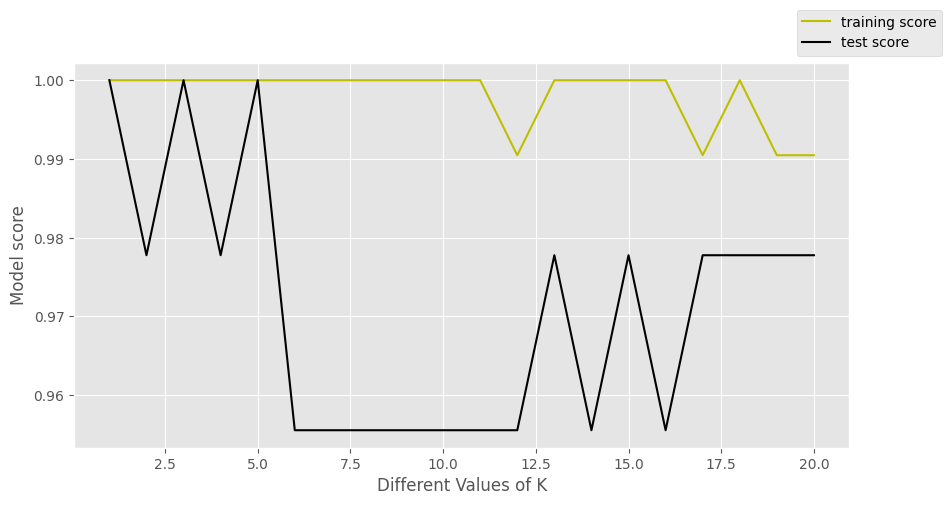

In [14]:
train_score = []
test_score = []
k_vals = []

for k in range(1, 21):
    k_vals.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    
    tr_score = knn.score(X_train, y_train)
    train_score.append(tr_score)
    
    te_score = knn.score(X_test, y_test)
    test_score.append(te_score)
    
plt.figure(figsize=(10,5))
plt.xlabel('Different Values of K')
plt.ylabel('Model score')
plt.plot(k_vals, train_score, color = 'y', label = "training score")
plt.plot(k_vals, test_score, color = 'k', label = 'test score')
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

Con respecto a este conjunto de datos, podemos observar que para valores bajos de k, la puntuación de la prueba de entrenamiento es mayor y, por otro lado, el conjunto de datos de prueba es bajo, para valores más altos de K, los resultados de la prueba son mejores que el entrenamiento. La compensación de la varianza del sesgo entra en escena al seleccionar el valor k óptimo.

Para varios valores de k en kNN, examinemos también cómo van a ser nuestras pérdidas, sesgos y varianzas.

Average expected loss 0.008555555555555556
Average bias 0.0
Average variance 0.008555555555555556
Average expected loss 0.01966666666666667
Average bias 0.022222222222222223
Average variance 0.017444444444444446
Average expected loss 0.013333333333333334
Average bias 0.0
Average variance 0.013333333333333332
Average expected loss 0.025777777777777778
Average bias 0.022222222222222223
Average variance 0.018666666666666668
Average expected loss 0.021000000000000005
Average bias 0.022222222222222223
Average variance 0.02011111111111111
Average expected loss 0.029222222222222226
Average bias 0.044444444444444446
Average variance 0.016777777777777777
Average expected loss 0.025333333333333333
Average bias 0.022222222222222223
Average variance 0.021111111111111112
Average expected loss 0.033
Average bias 0.044444444444444446
Average variance 0.013666666666666667
Average expected loss 0.028555555555555553
Average bias 0.044444444444444446
Average variance 0.019666666666666666
Average expected

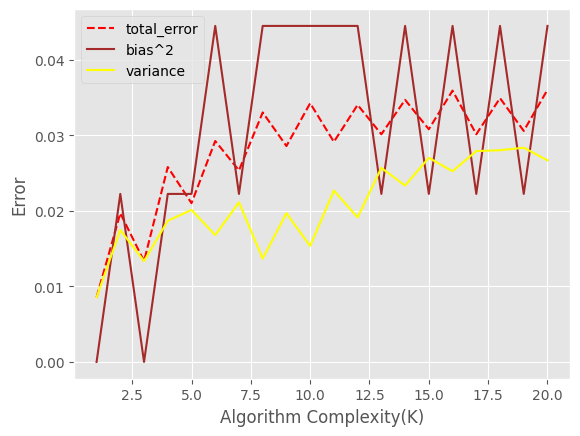

In [15]:
bias_KnnClass, var_KnnClass,error_KnnClass, = [], [], []
for k in range(1,21):
    clf_knn = KNeighborsClassifier(n_neighbors=k)
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(clf_knn, X_train, y_train, X_test, y_test, loss='0-1_loss', random_seed=123)
    bias_KnnClass.append(avg_bias)
    var_KnnClass.append(avg_var)
    error_KnnClass.append(avg_expected_loss)
    print(f"Average expected loss {avg_expected_loss}")
    print(f"Average bias {avg_bias}")
    print(f"Average variance {avg_var}")
plt.plot(range(1,21), error_KnnClass, 'red', label = 'total_error',linestyle='dashed')
plt.plot(range(1,21), bias_KnnClass, 'brown', label = 'bias^2')
plt.plot(range(1,21), var_KnnClass, 'yellow', label = 'variance')
plt.xlabel('Algorithm Complexity(K)')
plt.ylabel('Error')
plt.legend()

## Bias, Variance con TensorFlow

In [16]:
from mlxtend.evaluate import bias_variance_decomp
from mlxtend.data import boston_housing_data
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
import numpy as np

In [17]:
np.random.seed(1)
tf.random.set_seed(1)


X, y = boston_housing_data()
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=123,
                                                    shuffle=True)


model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation=tf.nn.relu),
    tf.keras.layers.Dense(1)
  ])

optimizer = tf.keras.optimizers.Adam()
model.compile(loss='mean_squared_error', optimizer=optimizer)

model.fit(X_train, y_train, epochs=100, verbose=0)

mean_squared_error(model.predict(X_test), y_test)

5/5 [==============================] - 0s 2ms/step


57.131742304673885

Calculemos la pérdida, el sesgo y la varianza.

In [18]:
np.random.seed(1)
tf.random.set_seed(1)
 

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        model, X_train, y_train, X_test, y_test, 
        loss='mse',
        num_rounds=100,
        random_seed=123,
        epochs=50,
        verbose=1) 


print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

Epoch 1/50


c:\Users\zukan\anaconda3\envs\env\lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 4ms/step - loss: 15661.8359
Epoch 2/50
12/12 [==============================] - 0s 3ms/step - loss: 1347.6569
Epoch 3/50
12/12 [==============================] - 0s 3ms/step - loss: 1058.9601
Epoch 4/50
12/12 [==============================] - 0s 3ms/step - loss: 261.6547
Epoch 5/50
12/12 [==============================] - 0s 3ms/step - loss: 250.5307
Epoch 6/50
12/12 [==============================] - 0s 3ms/step - loss: 165.7990
Epoch 7/50
12/12 [==============================] - 0s 3ms/step - loss: 164.8995
Epoch 8/50
12/12 [==============================] - 0s 3ms/step - loss: 150.6193
Epoch 9/50
12/12 [==============================] - 0s 3ms/step - loss: 142.0374
Epoch 10/50
12/12 [==============================] - 0s 7ms/step - loss: 136.4679
Epoch 11/50
12/12 [==============================] - 0s 4ms/step - loss: 130.2114
Epoch 12/50
12/12 [==============================] - 0s 3ms/step - loss: 125.7034
Epoch 13/50
12/12 [=============

Además, definitivamente se recomienda usar la misma cantidad de épocas de entrenamiento que usaría en el conjunto de entrenamiento original para garantizar que se logre la convergencia adecuada.